# Demo for performing cluster-biased PCA

In this notebook we present general functionalities of the `cluster_biased_pca` module.

### Cluster-biased PCA

A data set representing combustion of syngas in air generated from steady laminar flamelet model is used as a demo data set. We present a workflow for performing cluster-biased PCA on that data set using available functions:

- Equilibrating cluster populations
- Visualizing eigenvector weights movement
- Visualizing data set centers movement
- Visualizing eigenvalue distribution
- Performing re-sampling at equilibration until clustering convergence is reached

***

In [1]:
import PCAfold.train_test_select as tts
import PCAfold.clustering_data as cl
import PCAfold.cluster_biased_pca as cbpca
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set some initial parameters:
scal_crit = 'auto'
biasing_option = 2
n_clusters = 4
n_components = 2
save_plots = False
title = 'Demo run'

# Upload the sample data set:
state_space = pd.read_csv('COH2_slf_50000_state_space.csv', sep = ',', header=None).to_numpy()
source_state_space = pd.read_csv('COH2_slf_50000_state_space_sources.csv', sep = ',', header=None).to_numpy()
state_space_names = ['T', 'H2', 'O2', 'O', 'OH', 'H2O', 'H', 'HO2', 'CO', 'CO2', 'HCO']

We should now perform data set clustering that will result in an `idx` matrix that the function `equilibrate_cluster_populations` can use. Clustering can be performed with any technique of choice.

Here we decide to use K-Means clustering:

In [2]:
scaler = StandardScaler()
conditioning_variable = scaler.fit_transform(state_space)
kmeans = KMeans(n_clusters=n_clusters).fit(conditioning_variable)
idx = kmeans.labels_

***

## Run cluster equilibration

Notice that with `verbose=True` the function prints out the current number of samples taken from each cluster at each iteration.

In [3]:
(eigenvalues, eigenvectors, pc_scores, pc_sources, idx_train, X_center, X_scale) = cbpca.equilibrate_cluster_populations(state_space, idx, scaling=scal_crit, X_source=source_state_space, n_components=n_components, biasing_option=biasing_option, n_iterations=10, stop_iter=0, verbose=True)

Biasing is performed with option 2.

At iteration 1 taking samples:
{0: 5315, 1: 18494, 2: 15739, 3: 7579}

At iteration 2 taking samples:
{0: 5315, 1: 17030, 2: 14581, 3: 7328}

At iteration 3 taking samples:
{0: 5315, 1: 15566, 2: 13423, 3: 7077}

At iteration 4 taking samples:
{0: 5315, 1: 14102, 2: 12265, 3: 6826}

At iteration 5 taking samples:
{0: 5315, 1: 12638, 2: 11107, 3: 6575}

At iteration 6 taking samples:
{0: 5315, 1: 11174, 2: 9949, 3: 6324}

At iteration 7 taking samples:
{0: 5315, 1: 9710, 2: 8791, 3: 6073}

At iteration 8 taking samples:
{0: 5315, 1: 8246, 2: 7633, 3: 5822}

At iteration 9 taking samples:
{0: 5315, 1: 6782, 2: 6475, 3: 5571}

At iteration 10 taking samples:
{0: 5315, 1: 5315, 2: 5315, 3: 5315}


***

## Eigenvector weights movement

We are going to plot the first eigenvector (PC-1) weights movement with three variants of normalization. To access the first eigenvector one can simply do:

```python
eigenvectors[:,0,:]
```

similarly, to access the second eigenvector:

```python
eigenvectors[:,1,:]
```

and so on.

Let's start with no normalization `normalize=False`:

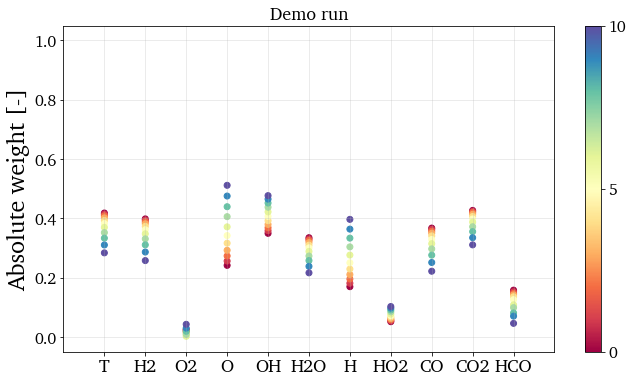

In [4]:
cbpca.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=False, zero_norm=False, title=title, save_plot=save_plots, save_filename='../images/documentation-plot-non-normalized')

Normalization with `normalize=True` and `zero_norm=False`:

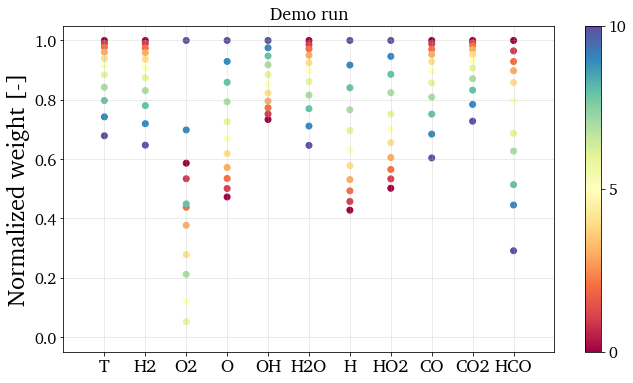

In [5]:
cbpca.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=True, zero_norm=False, title=title, save_plot=save_plots, save_filename='../images/documentation-plot-normalized')

Normalization with `normalize=True` and `zero_norm=True`:

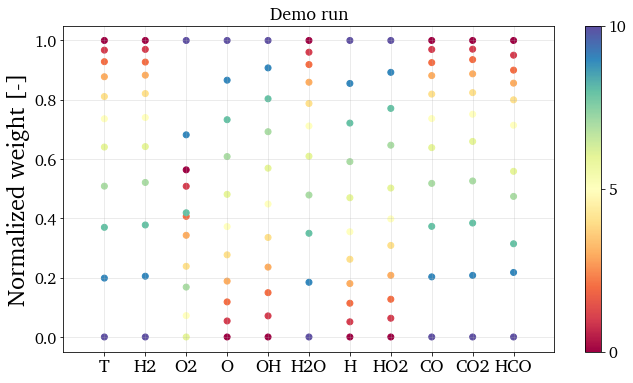

In [6]:
cbpca.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=True, zero_norm=True, title=title, save_plot=save_plots, save_filename='../images/documentation-plot-normalized-to-zero')

Note that in the above example the color bar marks the iteration number and so the $0^{th}$ iteration represents eigenvectors from the initial data set *(as-is)*. The last iteration, in this example $10^{th}$, represents eigenvectors computed on the *equilibrated* data set.

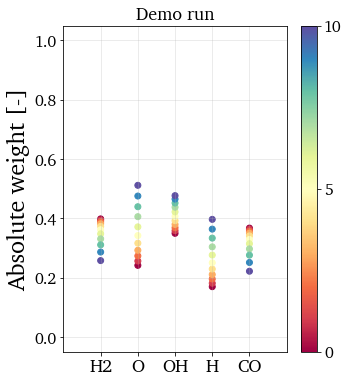

In [7]:
cbpca.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[1,3,4,6,8], normalize=False, zero_norm=False, title=title, save_plot=save_plots, save_filename='')

***

## Centers movement

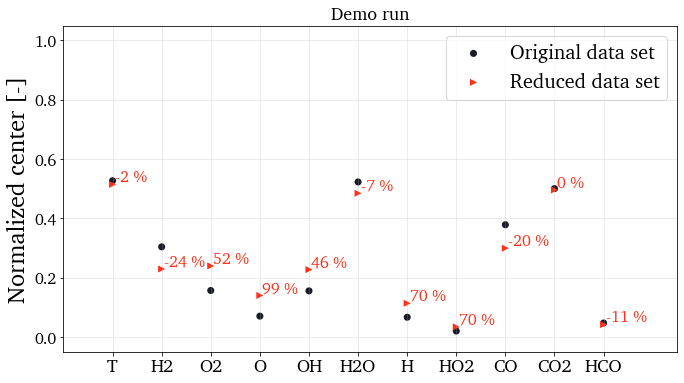

In [8]:
(centers_X, centers_X_r, perc) = cbpca.analyze_centers_movement(state_space, idx_train, variable_names=state_space_names, title=title, save_plot=save_plots, save_filename='')